In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

## Упражнение 1
* Реализуйте функцию plot_horizontal_bar, рисующую горизонтальные bar'ы


In [2]:
def plot_horizontal_bar(bars_length,labels,y_ticks_labels, figsize):
    plt.figure(figsize = figsize)
    ax = plt.barh(yticks_labels, bars_length, alpha = 0.4)
    plt.grid(True)
    plt.xticks(size = 30)
    plt.yticks(size = 30)
    
    rects = ax.patches
    
    for rect, label in zip(rects, labels):
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2
        space = 5
        if x_value < 0:
            x_value = 0
        plt.annotate(label,
                     (x_value, y_value),
                     xytext=(5, 0),
                     textcoords="offset points",
                     ha ='left',
                     va = 'center',
                     size = 30)

    
    return plt.show()

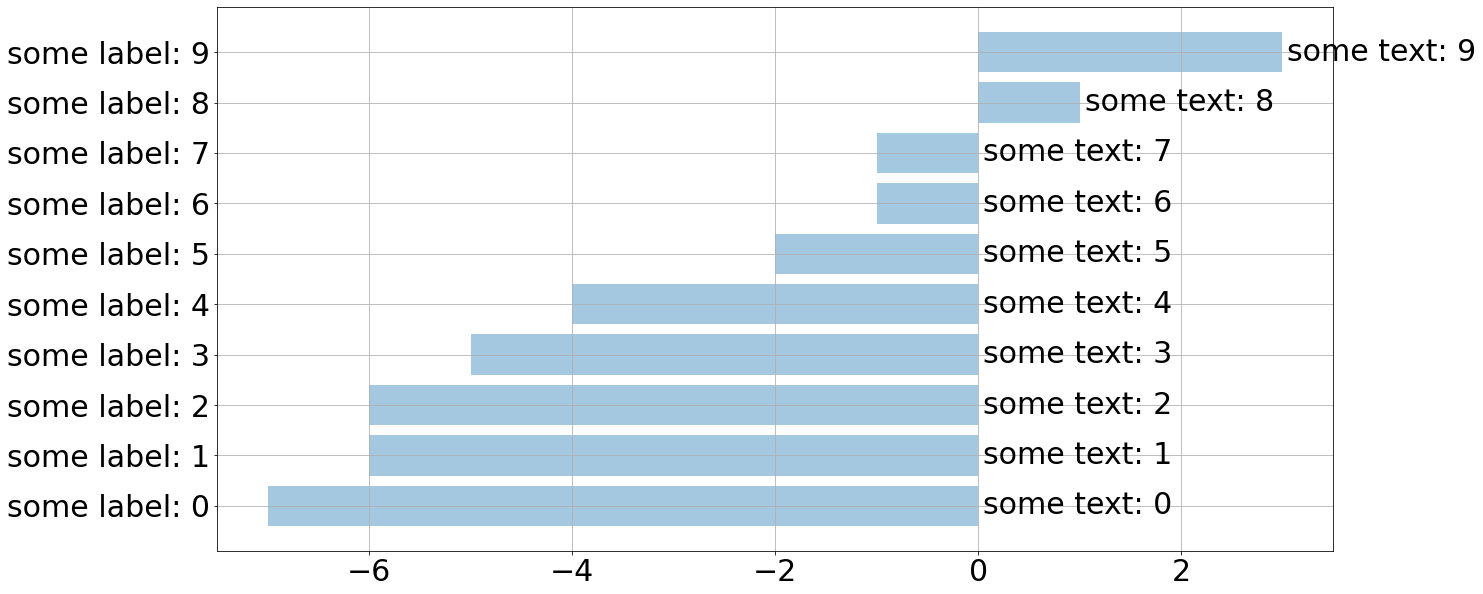

In [3]:
bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()

yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (20, 10)

plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)

##  Упражнение 2
* Реализуйте функцию plot_time_probabilities, рисующую изменяющиеся во времени вероятности неких событий.
* Cобытия для нас имеют тональность (от плохого к хорошему). Отразите ее на графике с помощью градиента по цвету.


In [4]:
def plot_time_probabilities(probabilities_in_time, figsize):
    plt.figure(figsize = figsize)
    lower = 0
    for col in probabilities_in_time:
        upper = lower + probabilities_in_time[col]
        plt.fill_between(probabilities_in_time.index, 
                         lower,
                         upper,
                         color =  matplotlib.cm.coolwarm(col*0.1))
        lower = upper
        plt.legend(['probability:'+ str(i) for i in range(10)], loc = 'lower left')
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.grid(True, axis = 'x')
    lower = 0
    for col in probabilities_in_time:             #выделяю линии границ для лучшей читаемости
        upper = lower + probabilities_in_time[col]
        plt.plot(upper, color = 'black', linewidth = 0.5, alpha = 0.5)
        lower = upper
    return plt.show()

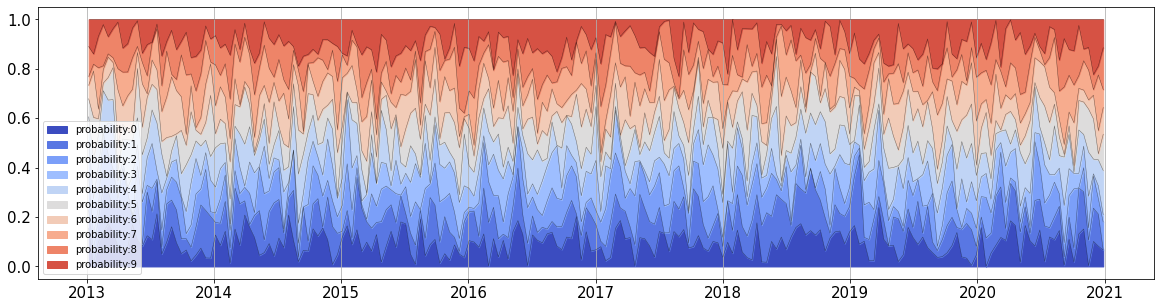

In [5]:
dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (20, 5)

plot_time_probabilities(probabilities_in_time, figsize)

## Упражнение 3
* Реализуйте функцию plot_intraday_ts, рисующую тепловую карту по временному ряду с внутридневными данными

In [10]:
def plot_intraday_ts(intraday_ts, figsize):
    
    shaped_intraday_ts = np.array(intraday_ts[:-1]).reshape(-1,24).T
    plt.figure(figsize = figsize)
    
    ax = plt.gca()
    ax.imshow(shaped_intraday_ts, cmap = 'RdBu')
    return plt.show()

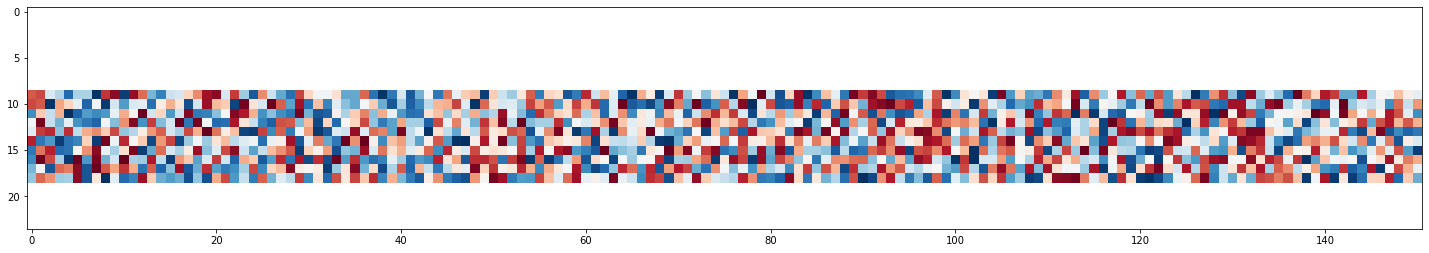

In [11]:
intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (25, 7)


plot_intraday_ts(intraday_ts, figsize)

In [ ]:
time = pd.to_datetime(intraday_ts.index).time
str_time = [str(t) for t in time[0:24]]


In [ ]:
dates = pd.to_datetime(intraday_ts.index).date
str_dates = [str(date) for date in dates[0:-1:24]]
